<font color="orange" size="5"><b> 📗 Introduction à la recherche textuelle  (partie 1)</b></font>

## 1. Comment chercher un "mot" dans un texte ?

On sait déjà chercher un **caractère** dans une chaîne de caractères.  
Par exemple : écrivez ci-dessous une fonction <code>trouve_lettre(c, texte)</code> qui renvoie le premier indice où l'on a trouvé la lettre `c` dans la chaîne de caractères `texte`, et qui renvoie None si la lettre cherchée ne s'y trouve pas.

### 💻 A vous de jouer 1

In [ ]:
def trouve_lettre(c, texte):
    """renvoie l'indice de la première occurrence de c dans texte
    ou renvoie None par convention sinon"""

    for i in range(len(texte)):
        if texte[i] == c:
            return i
    # si on est encore là : c'est qu'on n'a pas trouvé le caractère
    return None # Cette ligne n'est pas nécessaire

assert trouve_lettre('j', 'bonjour') == 3
assert trouve_lettre('j', 'alphabet') is None


Le problème est plus difficile quand il faut chercher non plus un seul caractère mais un **mot** dans le texte.

#### Vocabulaire : 
- on ne parlera pas de 'mot' mais de **motif**, ce qui est plus général.
- quand on trouve le motif cherché à un endroit du texte, on dira qu'il s'agit d'une **occurrence** du motif dans le texte : cela désignera l'indice `i` tel que <code>texte[i:i+1] == motif</code>

Rappel : la notation <code>chaine[i:j]</code> désigne la *tranche* de la chaîne comprise entre `i` inclus et `j` exclu. On parle de *slicing*.


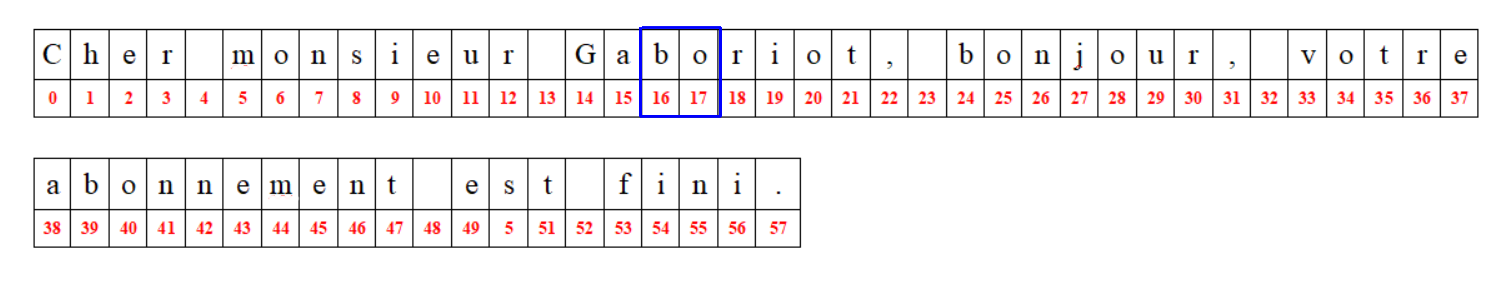

In [ ]:
# Exemple
texte = "Cher monsieur Gaboriot, bonjour, votre abonnement est fini"
motif = "bo"
print(texte[16: 18])
# Une occurrence du motif cherché est donc 16
# Il y en a d'autres...

### 1.1. La fonction `find` de Python

Python dispose d'une méthode <code>find()</code> attachée aux objets chaînes de caractère qui permet justement de trouver un motif dans la chaîne

Pour corser un peu l'affaire, on peut prendre un texte très long. Typiquement, on peut chercher un mot ou une phrase dans tout le texte d’un roman.

Le site http://www.gutenberg.org/browse/languages/fr propose les grands classiques de la littérature qui sont
tombés dans le domaine public. On peut par exemple y trouver le texte intégral du roman Le rouge et le noir de Stendhal dans
l’encodage UTF-8 : http://www.gutenberg.org/ebooks/798.txt.utf-8


### 💻 A vous de jouer 2  
Télécharger ce roman sur votre ordinateur, vérifiez l'encodage, puis ouvrir ce fichier texte avec Python et charger l'intégralité du fichier texte dans une variable nommée <code>stendhal</code>

Pour lire ce fichier vous pourrez trouver de la documentation ici : [python doctor](https://python.doctor/page-lire-ecrire-creer-fichier-python)

In [ ]:
# A vous
fichier = open('pg798.txt', 'r', encoding = 'utf-8')
stendhal = fichier.read()
fichier.close()
print(stendhal[0: 800])

In [ ]:
print(len(stendhal))

On peut chercher ensuite si le motif 'Julien trembla' apparaît quelque part dans le roman.

In [ ]:
stendhal.find('Julien trembla')

La méthode <code>find</code> a renvoyé un entier correspondant à l'indice de la première occurrence du motif dans le texte. D'ailleurs, on peut vérifier en faisant afficher la suite :

In [ ]:
stendhal[162926: 162973]

La méthode `find` renvoie -1 si le motif cherché n'apparaît pas dans le texte. Par exemple <code>stendhal.find('Joséphine')</code> renvoie −1 : le prénom Joséphine n’apparaît jamais dans le roman.


### 💻 A vous de jouer 3 

Une variante de la méthode `find` a deux arguments, le deuxième précise la **position de départ de la recherche**

1. En utilisant ce deuxième argument, trouvez s'il y a une occurrence suivante du motif : 'Julien trembla'  

In [ ]:
# Ecrire le test. Vous devez trouver une réponse négative.
stendhal.find('Julien trembla', 162927)

2. Trouvez les deux premières occurrences du mot : 'Julien' dans le roman

In [ ]:
occur_1 = stendhal.find('Julien')
occur_2 = stendhal.find('Julien', occur_1 + 1)
print("1ere occurence : ", occur_1)
print("2eme occurence : ", occur_2)

### 1.2. Application de la fonction `find` : compter le nombre d'occurrences

En utilisant la méthode `find`, il est relativement facile de compter les occurrences d'un motif dans un texte.  

### 💻 A vous de jouer 4 

1. Complétez ci-dessous le code de la fonction <code>nb_occurrences(texte, motif)</code>.

2. Trouvez combien de fois le mot "mort" apparaît dans le roman.

In [ ]:
def nb_occurrences(texte, motif):
    """renvoie le nombre de fois où motif apparaît dans texte """ 
    
    nb_occurence = 0 # Initialisation du nombre d'occurences
    indice_occurrence = 0 # indice à partir duquel on effectue la recherche find
    resultat = texte.find(motif , indice_occurrence)
    while resultat != -1: # Tant qu'il existe une autre occurence
        nb_occurence = nb_occurence + 1
        indice_occurrence = resultat + 1 # on se déplace après l'occurence trouvée
        resultat = texte.find(motif , indice_occurrence) # nouvelle recherche
    return nb_occurence



In [ ]:
# Quelques tests
assert nb_occurrences('bonjour monsieur gaboriot votre abonnement est fini', 'bo') == 3
assert nb_occurrences(stendhal, 'Julien') == 1908 
assert nb_occurrences(stendhal, 'amour') == 225
assert nb_occurrences(stendhal, 'informatique') == 0

Autre réponse possible avec une fonction récursive.

In [ ]:
import sys
sys.setrecursionlimit(2000)

def nb_occurrences_rec(texte, motif, i=0):
    occurence = texte.find(motif,i)
    if occurence == -1 :
        return 0
    else :
        return 1 + nb_occurrences_rec(texte, motif, occurence + 1)



In [ ]:
# Quelques tests
assert nb_occurrences_rec('bonjour monsieur gaboriot votre abonnement est fini', 'bo') == 3
assert nb_occurrences_rec(stendhal, 'Julien') == 1908
assert nb_occurrences_rec(stendhal, 'amour') ==225
assert nb_occurrences_rec(stendhal, 'informatique') == 0

---
Auteur : Marine Méra - Modification par François Hallé,  Jean-Louis Thirot (Lycée Bertrand d'Argentré) et Mireille Coilhac (lycée Saint-Aspais à Melun)


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.


---